# **Data Cleaning and Visualization - Zomato Dataset**

Zomato is a food delivery service based in India. Their services are important for Indians, providing a means of livelihood and convenience for the general populace.

Zomato relies on data analysis to draw insights on which restaurants are the most popular, and where restaurant 'hotspots' are located, so they can push those places and locations on their algorithm, in the hopes of boosting revenue. Having such analytics would also provide insights into areas with high demand, which would influence operational planning and delivery efficiency.

This notebook aims to clean, visualize and gain practicable insights from a publicly available Zomato dataset representing Bengaluru City from Kaggle to facilitate the decision making of Zomato managers and executives for their day-to-day operations.

## **Objectives**

The objectives of the notebook are listed below.

- Gather metadata on the dataset.
- Filter dataset to keep necessary data.
- Clean individual columns.
- Handle duplicate values.
- Handle NaN values.
- Visualize top 10 locations by average restaurant rating.
- Visualize top 10 restaurants with the most reviews.
- Visualize how votes and ratings interact for the top 10 restaurant chains.

## **Process Flow - Data Cleaning**

### **Gather metadata on the dataset**

First and foremost, I import all necessary libraries. These include

- `Pandas`, for handling the dataset.
- `Matplotlib`, for visualization.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

Next, I use `pandas` to read the CSV file and convert it to a DataFrame.

In [3]:
zomato = pd.read_csv('zomato.csv')

Now, I get an initial look at the DataFrame by viewing two rows.

In [4]:
zomato.head(2)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


Next, I read the metadata of the DataFrame to get an understanding of the data types of each column.

In [5]:
zomato.info()

<class 'pandas.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   url                          51717 non-null  str  
 1   address                      51717 non-null  str  
 2   name                         51717 non-null  str  
 3   online_order                 51717 non-null  str  
 4   book_table                   51717 non-null  str  
 5   rate                         43942 non-null  str  
 6   votes                        51717 non-null  int64
 7   phone                        50509 non-null  str  
 8   location                     51696 non-null  str  
 9   rest_type                    51490 non-null  str  
 10  dish_liked                   23639 non-null  str  
 11  cuisines                     51672 non-null  str  
 12  approx_cost(for two people)  51371 non-null  str  
 13  reviews_list                 51717 non-null  str  
 14  m

### **Filter dataset to keep necessary data**

To filter and obtain the necessary columns, I'd first need to know exactly which columns are in the dataset. For that, I'd use the `.columns` functionality to return an array of column names.

In [6]:
zomato.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='str')

I would then select the columns necessary for the visualization.

In [7]:
columns_to_keep = ['name','address', 'url', 'online_order', 'book_table', 'rate', 'votes', 'phone', 'location', 'approx_cost(for two people)']

Filtering the data using a new DataFrame called `restaurant`, and viewing the new DataFrame structure.

In [8]:
restaurant = zomato[columns_to_keep]
restaurant.head(2)

,name,address,url,online_order,book_table,rate,votes,phone,location,approx_cost(for two people)
0,Jalsa,"942, 21st Main Road, 2nd Stage, Banashankari, ...",https://www.zomato.com/bangalore/jalsa-banasha...,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,800
1,Spice Elephant,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",https://www.zomato.com/bangalore/spice-elephan...,Yes,No,4.1/5,787,080 41714161,Banashankari,800


### **Clean individual columns**

From observing the data, there are particular anomalies that I noticed.

- Some rows in the `phone` column contains two values separated by `\r\n`. These values would need to be sorted.
- Some numbers in the same `phone` column had spaces between them.
- Some restaurant names always returned corrupted characters and such characters would need to be removed.

Below is how I cleaned those rows. I:

- Created a `secondary_phone` column, for storage of the second phone numbers.
- Split the original `phone` column to take only the phone numbers before the newline characters.
- Replaced all non-ASCII characters in the `names` column.

In [9]:
restaurant['secondary_phone'] = restaurant['phone'].str.split(r"\r\n", regex=True).str[1].str.replace(' ', '')
restaurant['phone'] = restaurant['phone'].str.split(r"\r\n", regex=True).str[0].str.replace(' ', '')
restaurant['name'] = restaurant['name'].astype(str).str.replace(r'[^\x00-\x7F]+', '', regex=True)

I also decided to get rid of the web protocol from the `url` column to make it easier to read.

In [10]:
restaurant['url'] = restaurant['url'].str.replace('https://', '')

For later training by a Machine Learning model, I converted the `online_order` categories to 1 and 0. 

In [11]:
restaurant['online_order'] = restaurant['online_order'].apply(lambda x: 1 if x =="Yes" else 0)

I then formatted and converted the `rate`  and `approx_cost(for two people)` columns to numeric values.

In [12]:
restaurant['rate'] = restaurant['rate'].str.split('/').str[0]
restaurant['rate'] = pd.to_numeric(restaurant['rate'], errors='coerce')

In [13]:
restaurant['approx_cost(for two people)'] = pd.to_numeric(restaurant['approx_cost(for two people)'], errors='coerce')

Visualizing the data again to see the changes I made.

In [14]:
restaurant.head(2)

,name,address,url,online_order,book_table,rate,votes,phone,location,approx_cost(for two people),secondary_phone
0,Jalsa,"942, 21st Main Road, 2nd Stage, Banashankari, ...",www.zomato.com/bangalore/jalsa-banashankari?co...,1,Yes,4.1,775,08042297555,Banashankari,800.0,+919743772233
1,Spice Elephant,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",www.zomato.com/bangalore/spice-elephant-banash...,1,No,4.1,787,08041714161,Banashankari,800.0,NaN


### **Handle duplicate values**

To ensure consistency, I had to get rid of the duplicates in my data. But before that, I needed to check if there even *were* duplicates.

In [15]:
restaurant.duplicated().sum()

np.int64(0)

Fortunately, there aren't any exact copies in this dataset.

### **Handle NaN values**

To effectively clean the data, I had to find out which data was missing in which column using the `isna().sum()` method.

In [16]:
restaurant.isna().sum()

name                               0
address                            0
url                                0
online_order                       0
book_table                         0
rate                           10052
votes                              0
phone                           1208
location                          21
approx_cost(for two people)     7263
secondary_phone                39225
dtype: int64

I then decided to store the initial number of rows and name it `test1`. This would later be used to check the percentage of data lost from handling NaN values.

In [17]:
test1 = restaurant.shape[0]
test1

51717

I decided to fill in some NaN values using the median of the distribution. I did this in two ways:

1. For restaurant names with the same names as restaurants with non-NaN values, the median of that particular restaurant's name's column was used.
2. For restaurant names whose instances had only NaN values, the median of the entire restaurant column was used.

In [18]:
restaurant['approx_cost(for two people)'] = restaurant.groupby('name')['approx_cost(for two people)'].transform(lambda x: x.fillna(x.median()))
restaurant['approx_cost(for two people)'].fillna(restaurant['approx_cost(for two people)'].median(), inplace=True)


C:\Users\legen\AppData\Local\Temp\ipykernel_27716\333404796.py:2: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  restaurant['approx_cost(for two people)'].fillna(restaurant['approx_cost(for two people)'].median(), inplace=True)


0        800.0
1        800.0
2        800.0
3        300.0
4        600.0
         ...  
51712    400.0
51713    600.0
51714    400.0
51715    400.0
51716    400.0
Name: approx_cost(for two people), Length: 51717, dtype: float64

In [19]:
restaurant['votes'] = restaurant.groupby('name')['votes'].transform(lambda x: x.fillna(x.median()))
restaurant['votes'].fillna(restaurant['votes'].median(), inplace=True)

C:\Users\legen\AppData\Local\Temp\ipykernel_27716\3744210587.py:2: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  restaurant['votes'].fillna(restaurant['votes'].median(), inplace=True)


0        775
1        787
2        918
3         88
4        166
        ... 
51712     27
51713      0
51714      0
51715    236
51716     13
Name: votes, Length: 51717, dtype: int64

To preserve the structural integrity of `restaurant`, I decided to create a new DataFrame for the visualization called `viz_df` with some NaN values dropped. I used `rate` and `location` as my subsets with a threshold value of 2, meaning that both `rate` and `location` must not be NaN for them to be included in the new DataFrame.

In [20]:
viz_df = restaurant.dropna(subset=['rate', 'location'], thresh = 2)

In [21]:
viz_df.head(2)

,name,address,url,online_order,book_table,rate,votes,phone,location,approx_cost(for two people),secondary_phone
0,Jalsa,"942, 21st Main Road, 2nd Stage, Banashankari, ...",www.zomato.com/bangalore/jalsa-banashankari?co...,1,Yes,4.1,775,08042297555,Banashankari,800.0,+919743772233
1,Spice Elephant,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",www.zomato.com/bangalore/spice-elephant-banash...,1,No,4.1,787,08041714161,Banashankari,800.0,NaN


Retrieving the number of rows in `viz_df`.

In [22]:
test2 = viz_df.shape[0]
test2

41665

Calculating the percentage of data lost in the dropping of NaN values.

In [23]:
(test1 - test2)*100/test1

19.436548910416303

And lastly, confirming that `rate`, `votes`, and `location` are all non-NaN values.

In [24]:
viz_df.isna().sum()

name                               0
address                            0
url                                0
online_order                       0
book_table                         0
rate                               0
votes                              0
phone                            814
location                           0
approx_cost(for two people)     6553
secondary_phone                30533
dtype: int64

## **Process Flow - Visualization**

Now that I have cleaned the dataset, it is time to visualize the dataset to make inferences. 

### **Visualize top 10 locations by average restaurant rating**

First, I would visualize the top 10 locations in Bengaluru City based on average restaurant rating.  This provides an idea of where high-quality restaurants might be concentrated.

Note that this data does not consider the number of votes, so it may not reflect popularity, but average ratings.

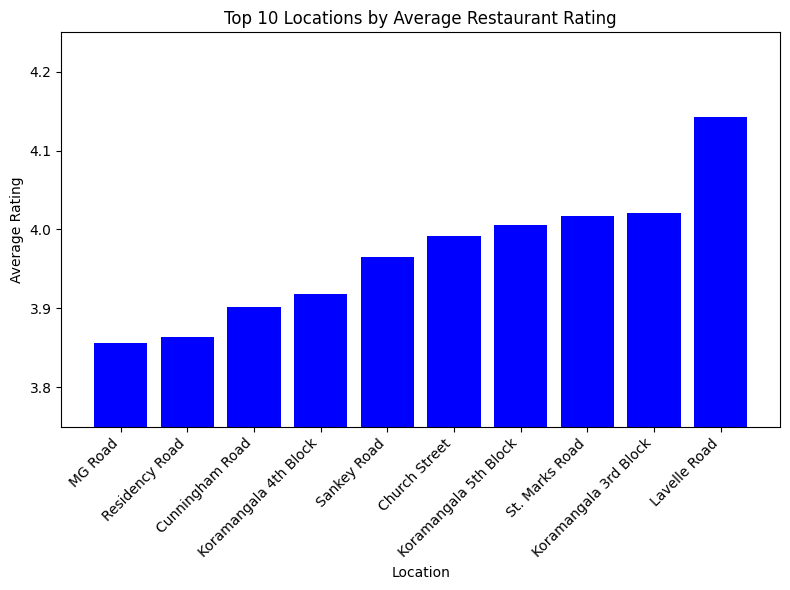

In [25]:
avg_rating = viz_df.groupby('location')['rate'].mean().sort_values(ascending=True)
top_locations = avg_rating.tail(10)

plt.figure(figsize=(8,6))
plt.bar(top_locations.index, top_locations.values, color='#0000FF')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Location")
plt.ylabel("Average Rating")
plt.title("Top 10 Locations by Average Restaurant Rating")
plt.tight_layout()
plt.ylim(3.75, 4.25)
plt.show()


### **Visualize top 10 restaurants with the most reviews**

Next, I considered visualizing a horizontal bar graph showing the top 10 restaurants by total votes. A larger number of votes reduces the likelihood of biased ratings influencing the average, and this lends credibility to the average rating of such restaurant chains, which serves as a good indicator of the quality of service of such chains.

Text(0.5, 1.0, 'Top 10 Restaurants by total votes')

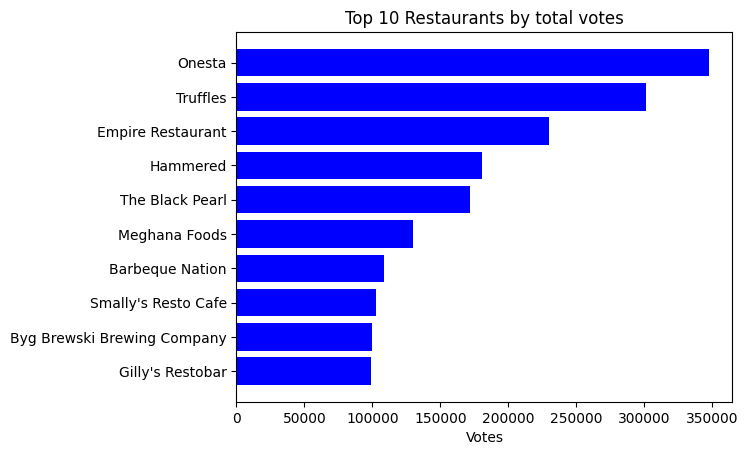

In [26]:
average_votes = viz_df.groupby('name')['votes'].sum().sort_values(ascending=True)
top_10_votes = average_votes.tail(10)

plt.Figure(figsize=(12,12))
plt.barh(top_10_votes.index, top_10_votes.values, color='#0000FF')
plt.xlabel('Votes')
plt.title('Top 10 Restaurants by total votes')

### **Visualize how votes and ratings interact for the top 10 restaurant chains by rate**

Lastly, I visualized a scatter plot showing total votes against average rating, by selecting the top 10 restaurant chains by rate. This also provides a good method of assessing the credibility of such restaurant chains, as a higher vote count would be more stable against biased reviews.

Text(0.5, 1.0, 'A plot of votes vs rating (top 10 restaurants)')

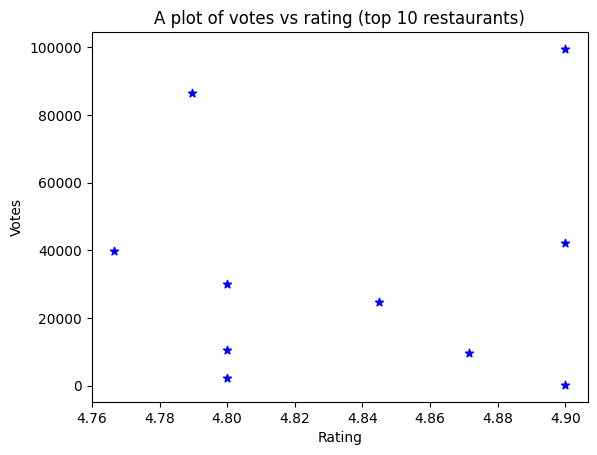

In [27]:
pairs = viz_df.groupby('name').agg({'rate': 'mean', 'votes':'sum'}).sort_values(by='rate', ascending=True)
top_10 = pairs.tail(10)
plt.scatter(top_10['rate'], top_10['votes'], c='#0000FF', marker='*')
plt.xlabel('Rating')
plt.ylabel('Votes')
plt.title('A plot of votes vs rating (top 10 restaurants)')